<a href="https://colab.research.google.com/github/darinzahira/PCVK_Genap_2021/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
def convolution2d(image, kernel, stride, padding):

  # add paddinng
  image = np.pad(image, padding, mode='constant', constant_values=0)

  # pick img input width and height values including insertion pad
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

In [4]:
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [5]:
#image sharpen
kernel_sharpen = np.array([[0,-1,0], [-1,5,-1],[0,-1,0]])

#emboss
kernel_emboss = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])

#canny edge detection
kernel_canny = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

#left Sobel filter
kernel_sobel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])

#box blur
kernel_box = (1 / 9.0) * np.array([[1,1,1],[1,1,1],[1,1,1]])

#3x3 gaussian blur
kernel_gaussian3 = (1/16.0)*np.array([[1,2,1],[2,4,2],[1,2,1]])

#gaussian blur 5x5
kernel_gaussian5 = (1/256.0) * np.array([[1,4,6,4,1], [4,16,24,16,4],[6,24,36,24,6], [4,16,24,16,4],[1,4,6,4,1]])

# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

#low pass filter
kernel_low = (1/12.0)*np.array([[1,1,1], [1,4,1], [1,1,1]])

#high pass filter
kernel_high = np.array([[-1,0,1], [-1,0,3],[-3,0,1]])

#menyimpan semua kernel pada array
kernels = [kernel_sharpen, kernel_emboss, kernel_sobel, kernel_canny, gauss_kernel, kernel_gaussian5, kernel_low, kernel_high]
kernel_name = ['Sharpen','Emboss','Left Sobel Edge Detection','Canny Edge Detection','21x21 Gaussian Blur', '5x5 Gaussian Blur','Low Pass Filter','High Pass Filter']

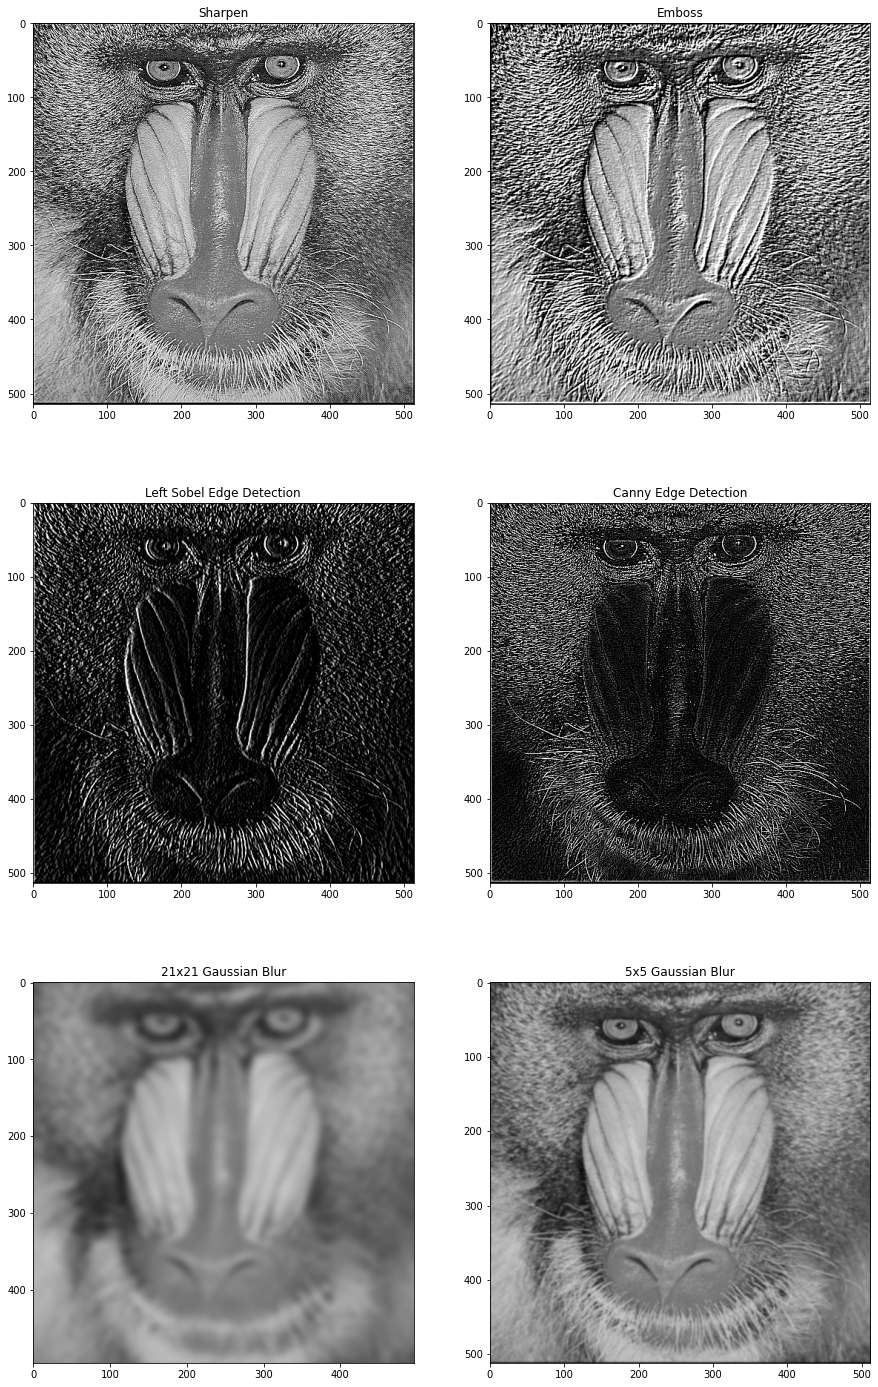

In [6]:
figure, axis = plt.subplots(3,2, figsize=(15,25))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
  conv_image=im.fromarray(convolution2d(img_gray, kernel[::-1, ::-1],1,2))
  ax.imshow(conv_image)
  ax.set_title(name)